In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm
import scipy.stats as stats
import random

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')
sns.set(font_scale=1.4)


**Describe how you want to make use of merchants.csv, historical transactions.csv, and new merchant transactions.csv, for user loyalty prediction. Note, this is a very important question, you may want to update your whole pipeline multiple times to find the best usage of three files**

* First I will deal with each seperate table (i.e. Filling nulls , dropping dublicates and removing outliars )
* Then I will concatenate new Merchant with historical transactions 
* Then i will join all tables 




In [2]:
user_Score=pd.read_csv(r'Data/userscore.csv')
new_marchant=pd.read_csv(r'Data/new_merchant_transactions.csv')
marchants=pd.read_csv(r'Data/merchants.csv')
historical_transaction=pd.read_csv(r'Data/historical_transactions.csv')

In [3]:
print('User Score table:')
user_Score.head()
print('User Score information :')
user_Score.info()



User Score table:


,card_id,first_active_month,feature_1,feature_2,feature_3,score
0,C_ID_92a2005557,Jun-17,5,2,1,-0.820283
1,C_ID_3d0044924f,Jan-17,4,1,0,0.392913
2,C_ID_d639edf6cd,Aug-16,2,2,0,0.688056
3,C_ID_186d6a6901,Sep-17,4,3,0,0.142495
4,C_ID_cdbd2c0db2,Nov-17,1,3,0,-0.159749


User Score information :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   card_id             201917 non-null  object 
 1   first_active_month  201917 non-null  object 
 2   feature_1           201917 non-null  int64  
 3   feature_2           201917 non-null  int64  
 4   feature_3           201917 non-null  int64  
 5   score               201917 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ MB


In [4]:
print('New Marchant table:')
new_marchant.head()
print("*"*200)
print('Nulls of New Marchant Table : ')
new_marchant.isna().sum()

New Marchant table:


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


********************************************************************************************************************************************************************************************************
Nulls of New Marchant Table : 


authorized_flag              0
card_id                      0
city_id                      0
category_1                   0
installments                 0
category_3               55922
merchant_category_id         0
merchant_id              26216
month_lag                    0
purchase_amount              0
purchase_date                0
category_2              111745
state_id                     0
subsector_id                 0
dtype: int64

In [5]:
print('Marchant Table :')
marchants.head()
print("*"*200)
print('Nulls of Marchant Table : ')
marchants.isna().sum()

Marchant Table :


,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


********************************************************************************************************************************************************************************************************
Nulls of Marchant Table : 


merchant_id                        0
merchant_group_id                  0
merchant_category_id               0
subsector_id                       0
numerical_1                        0
numerical_2                        0
category_1                         0
most_recent_sales_range            0
most_recent_purchases_range        0
avg_sales_lag3                    13
avg_purchases_lag3                 0
active_months_lag3                 0
avg_sales_lag6                    13
avg_purchases_lag6                 0
active_months_lag6                 0
avg_sales_lag12                   13
avg_purchases_lag12                0
active_months_lag12                0
category_4                         0
city_id                            0
state_id                           0
category_2                     11887
dtype: int64

<Axes: >

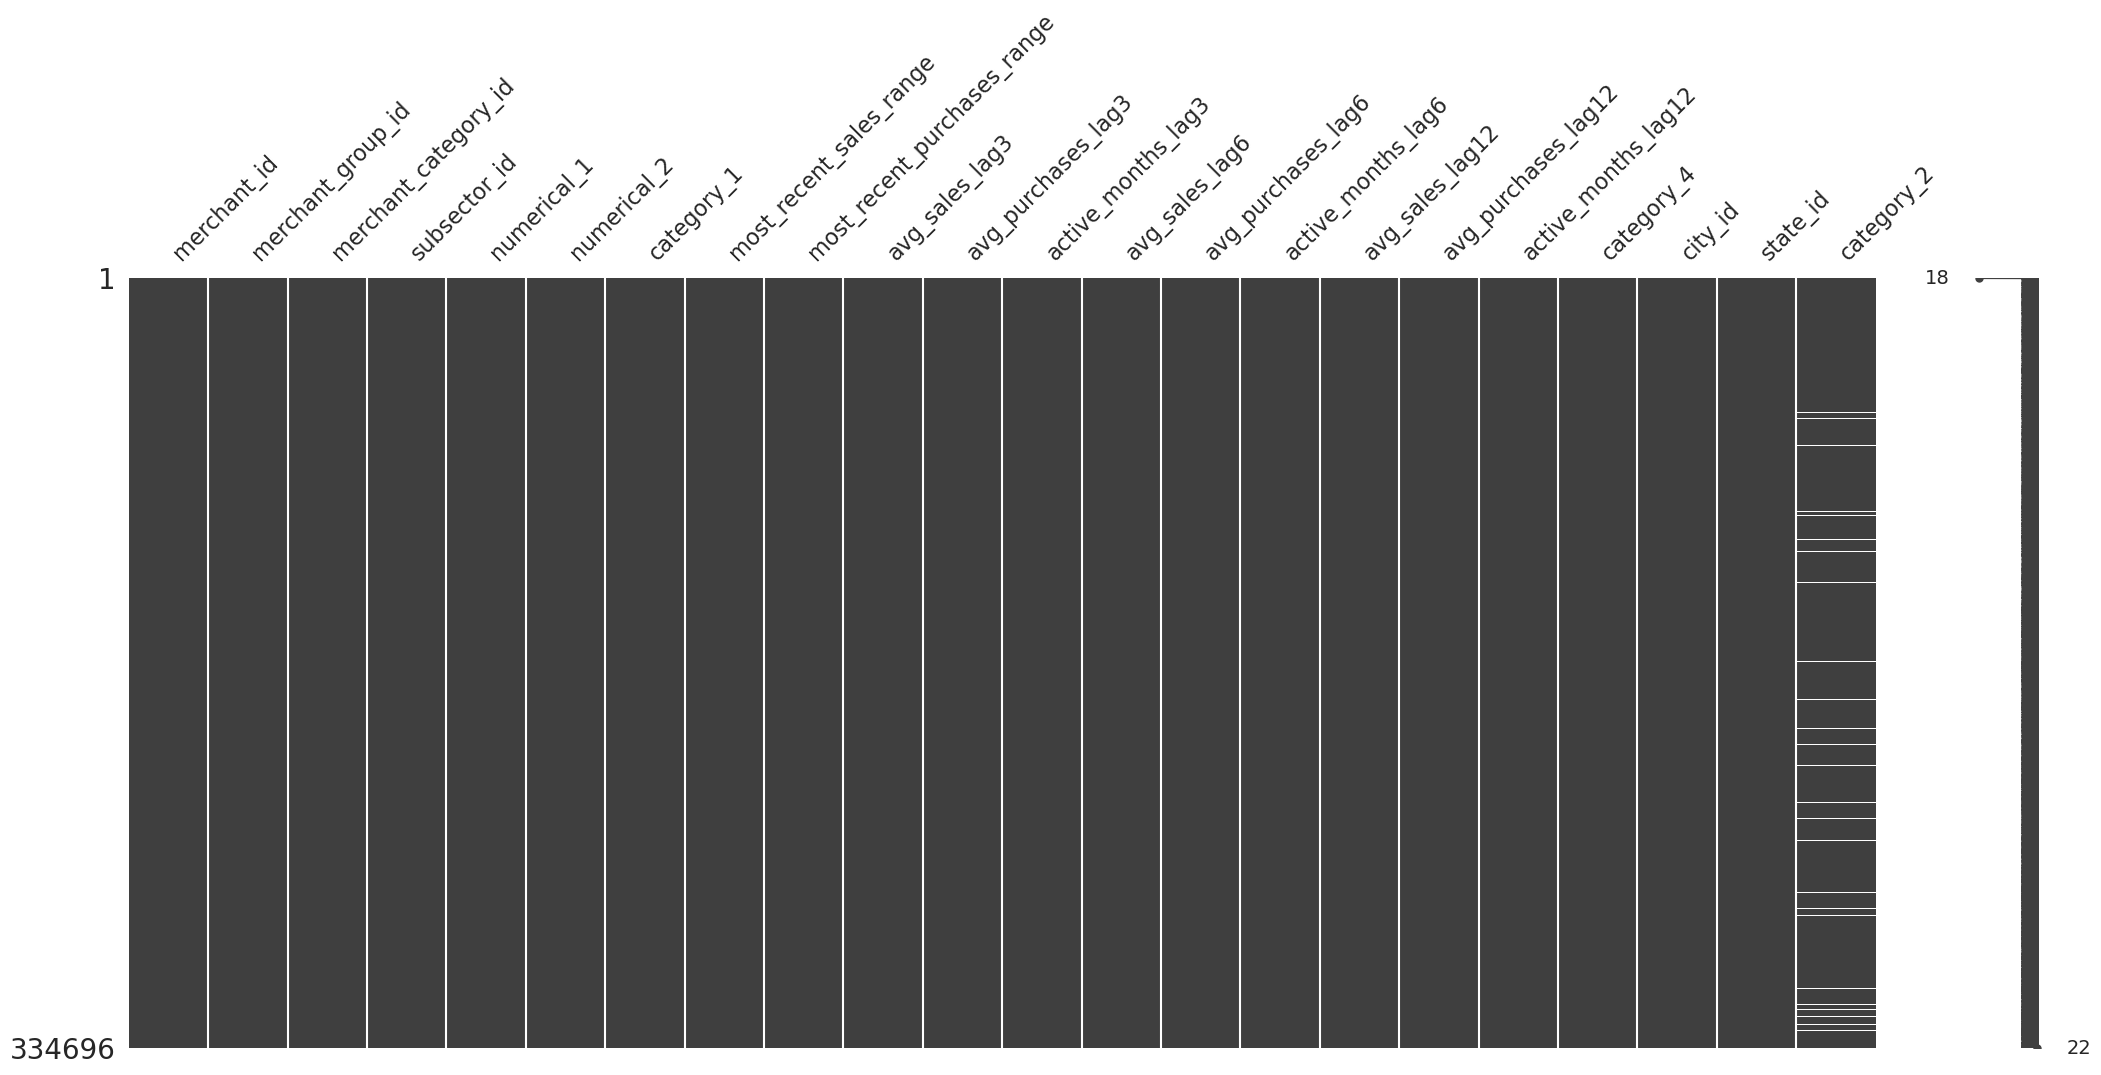

In [6]:
msno.matrix(marchants)

* If we look at category_2 missing values we will notice that is Completly at Random in this table **MCAR**

In [7]:
marchants.loc[marchants['avg_sales_lag3'].isna()==True,['avg_sales_lag3','avg_sales_lag6','avg_sales_lag12']]

,avg_sales_lag3,avg_sales_lag6,avg_sales_lag12
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN
10,NaN,NaN,NaN
11,NaN,NaN,NaN
12,NaN,NaN,NaN


* If we look at this we will notice that the missing here is **MNAR** and pattern here is **Unit Nonresponse Pattern**
* So we will Try to impute these features 

In [8]:
marchants.describe()

,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,city_id,state_id,category_2
count,334696.000000,334696.000000,334696.000000,334696.000000,334696.000000,334683.000000,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000,334696.000000,334696.000000,322809.000000
mean,31028.736143,423.131663,25.116404,0.011476,0.008103,13.832993,inf,2.994108,2.165079e+01,inf,5.947397,2.522771e+01,inf,11.599335,102.917926,11.860942,2.380002
std,31623.043426,252.898046,9.807371,1.098154,1.070497,2395.489999,NaN,0.095247,3.947108e+03,NaN,0.394936,5.251842e+03,NaN,1.520138,107.090673,6.176889,1.562661
min,1.000000,-1.000000,-1.000000,-0.057471,-0.057471,-82.130000,3.334953e-01,1.000000,-8.213000e+01,1.670447e-01,1.000000,-8.213000e+01,9.832954e-02,1.000000,-1.000000,-1.000000,1.000000
25%,3612.000000,222.000000,19.000000,-0.057471,-0.057471,0.880000,9.236499e-01,3.000000,8.500000e-01,9.022475e-01,6.000000,8.500000e-01,8.983333e-01,12.000000,-1.000000,9.000000,1.000000
50%,19900.000000,373.000000,27.000000,-0.057471,-0.057471,1.000000,1.016667e+00,3.000000,1.010000e+00,1.026961e+00,6.000000,1.020000e+00,1.043361e+00,12.000000,69.000000,9.000000,2.000000
75%,51707.250000,683.000000,33.000000,-0.047556,-0.047556,1.160000,1.146522e+00,3.000000,1.230000e+00,1.215575e+00,6.000000,1.290000e+00,1.266480e+00,12.000000,182.000000,16.000000,4.000000
max,112586.000000,891.000000,41.000000,183.735111,182.079322,851844.640000,inf,3.000000,1.513959e+06,inf,6.000000,2.567408e+06,inf,12.000000,347.000000,24.000000,5.000000


* From this description we notice :
* There are some features that it's max is infinity **[avg_purchases_lag6,avg_purchases_lag12,avg_purchases_lag3]**
* columns like **active_months_lag12** , **active_months_lag3** and **active_months_lag6** won't add value as their values are almost 12 
* columns like **[ avg_sales_lag3,avg_sales_lag12, avg_sales_lag3, avg_sales_lag6]** has outliars which affected mean and std
* columns like **[numerical_1,numerical_2]** are almost the same

In [9]:
print('Historical Transaction Table : ')
historical_transaction.head()
print("*"*200)
print('Nulls of Historical Transaction Table : ')
historical_transaction.isna().sum()

Historical Transaction Table : 


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


********************************************************************************************************************************************************************************************************
Nulls of Historical Transaction Table : 


authorized_flag               0
card_id                       0
city_id                       0
category_1                    0
installments                  0
category_3               178159
merchant_category_id          0
merchant_id              138481
month_lag                     0
purchase_amount               0
purchase_date                 0
category_2              2652864
state_id                      0
subsector_id                  0
dtype: int64

<Axes: >

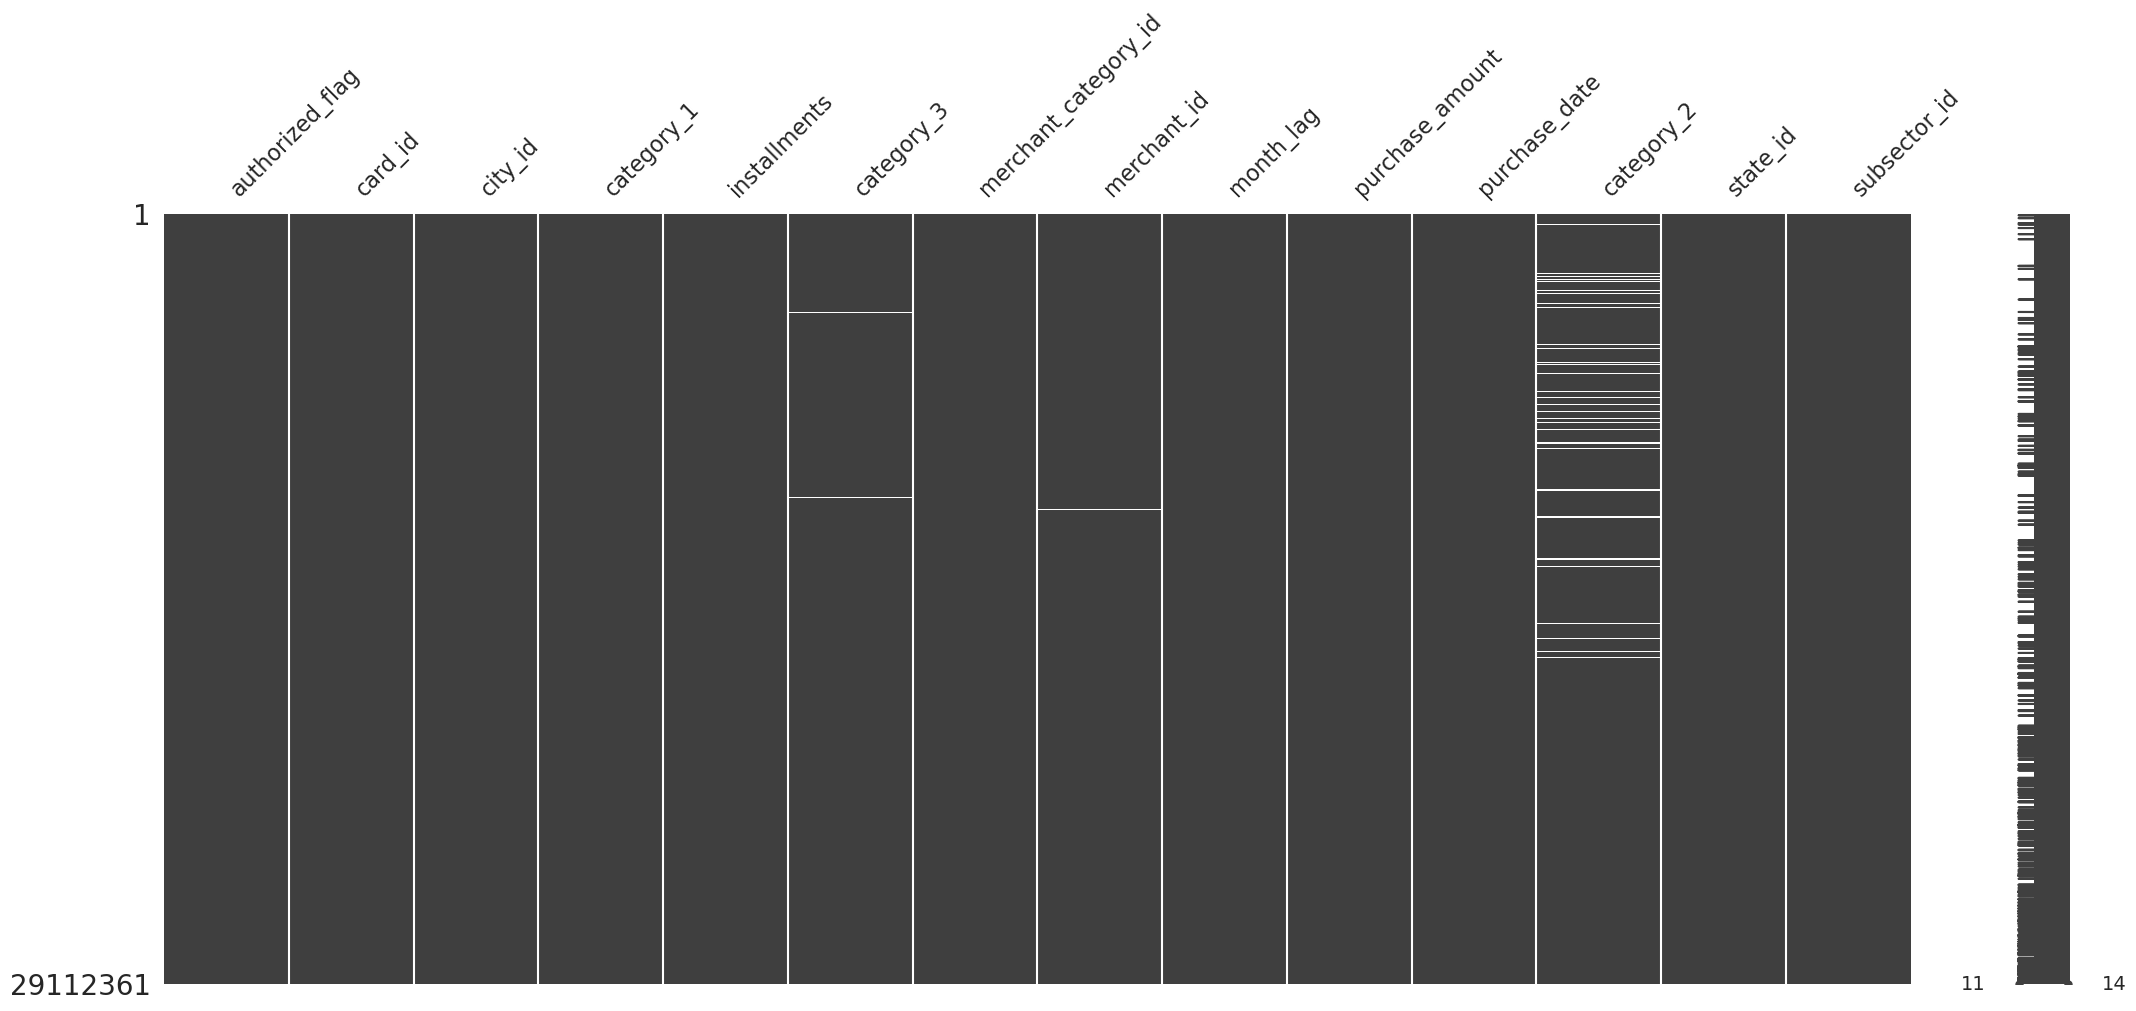

In [10]:
msno.matrix(historical_transaction)

* If we look at the missing in category_2 we will notice that it's pattern is General pattern and data missing completly at Random **(MCAR)**

In [11]:
historical_transaction.describe(include="all")

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
count,29112361,29112361,2.911236e+07,29112361,2.911236e+07,28934202,2.911236e+07,28973880,2.911236e+07,2.911236e+07,29112361,2.645950e+07,2.911236e+07,2.911236e+07
unique,2,325540,NaN,2,NaN,3,NaN,326311,NaN,NaN,16395300,NaN,NaN,NaN
top,Y,C_ID_3d3dfdc692,NaN,N,NaN,A,NaN,M_ID_00a6ca8a8a,NaN,NaN,2017-11-24 00:00:00,NaN,NaN,NaN
freq,26595452,5582,NaN,27028332,NaN,15411747,NaN,1115097,NaN,NaN,26184,NaN,NaN,NaN
mean,NaN,NaN,1.293256e+02,NaN,6.484954e-01,NaN,4.810130e+02,NaN,-4.487294e+00,3.640090e-02,NaN,2.194578e+00,1.056679e+01,2.684839e+01
std,NaN,NaN,1.042563e+02,NaN,2.795577e+00,NaN,2.493757e+02,NaN,3.588800e+00,1.123522e+03,NaN,1.531896e+00,6.366927e+00,9.692793e+00
min,NaN,NaN,-1.000000e+00,NaN,-1.000000e+00,NaN,-1.000000e+00,NaN,-1.300000e+01,-7.469078e-01,NaN,1.000000e+00,-1.000000e+00,-1.000000e+00
25%,NaN,NaN,5.300000e+01,NaN,0.000000e+00,NaN,3.070000e+02,NaN,-7.000000e+00,-7.203559e-01,NaN,1.000000e+00,9.000000e+00,1.900000e+01
50%,NaN,NaN,9.000000e+01,NaN,0.000000e+00,NaN,4.540000e+02,NaN,-4.000000e+00,-6.883495e-01,NaN,1.000000e+00,9.000000e+00,2.900000e+01
75%,NaN,NaN,2.120000e+02,NaN,1.000000e+00,NaN,7.050000e+02,NaN,-2.000000e+00,-6.032543e-01,NaN,3.000000e+00,1.600000e+01,3.400000e+01


In [12]:
historical_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   authorized_flag       object 
 1   card_id               object 
 2   city_id               int64  
 3   category_1            object 
 4   installments          int64  
 5   category_3            object 
 6   merchant_category_id  int64  
 7   merchant_id           object 
 8   month_lag             int64  
 9   purchase_amount       float64
 10  purchase_date         object 
 11  category_2            float64
 12  state_id              int64  
 13  subsector_id          int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 3.0+ GB


In [13]:
l=[user_Score,new_marchant,marchants,historical_transaction]
z=['user_Score','new_marchant','marchants','historical_transaction']
for a,i in zip(z,l) :
    print ('Shape of {0} is : {1}'.format(a,i.shape))

Shape of user_Score is : (201917, 6)
Shape of new_marchant is : (1963031, 14)
Shape of marchants is : (334696, 22)
Shape of historical_transaction is : (29112361, 14)


In [14]:
authorized_flag_count=pd.DataFrame(historical_transaction['authorized_flag'].value_counts())
category_1_count=pd.DataFrame(historical_transaction['category_1'].value_counts())

<Axes: ylabel='count'>

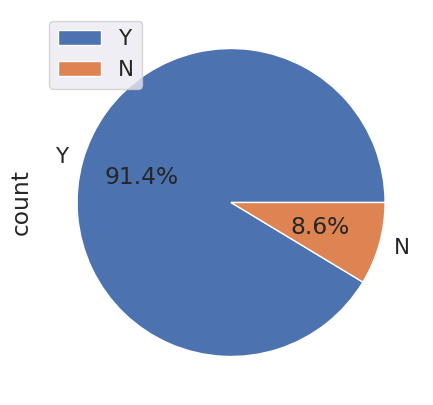

In [15]:
authorized_flag_count.plot.pie(y='count',figsize=(5,5),autopct='%1.1f%%')


<Axes: ylabel='count'>

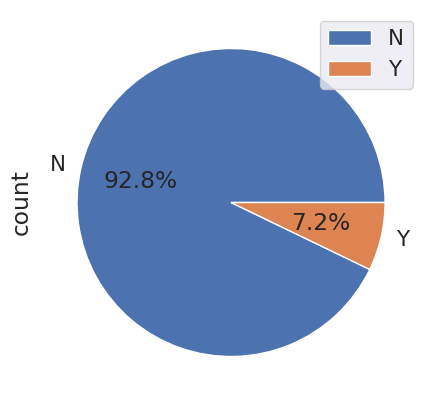

In [16]:
category_1_count.plot.pie(y='count',figsize=(5,5),autopct='%1.1f%%')


* From the above describe we ge :
* installments feature has outliars

**Q2 ) Discuss the quality of the dataset, considering missing values, missing value patterns, missing value mechanism, and noise (e.g.,consistency).**

* First As we saw there are not mich missing values in Data , and we described it's pattern above .
* I notices that there are many feature **has been masked** which is mandatory as we deal with banking data but it will affect accuracy
* Now i will concatenate tables and trying to handle missing values .



### Data Cleaning

In [17]:
columsToDrop=[]

In [18]:
# I will concatenate two columns historical_transaction and new_marchant as they are have the same features 
historicalNewmarchant=pd.concat([historical_transaction,new_marchant])

In [19]:
historicalNewmarchant.isna().sum()

authorized_flag               0
card_id                       0
city_id                       0
category_1                    0
installments                  0
category_3               234081
merchant_category_id          0
merchant_id              164697
month_lag                     0
purchase_amount               0
purchase_date                 0
category_2              2764609
state_id                      0
subsector_id                  0
dtype: int64

* There are some features which are not important like **['City id ','merchant_category_id','state_id','subsector_id']**


In [20]:
for i in ['city_id','merchant_category_id','state_id','subsector_id'] :
    columsToDrop.append(i)

<Axes: ylabel='count'>

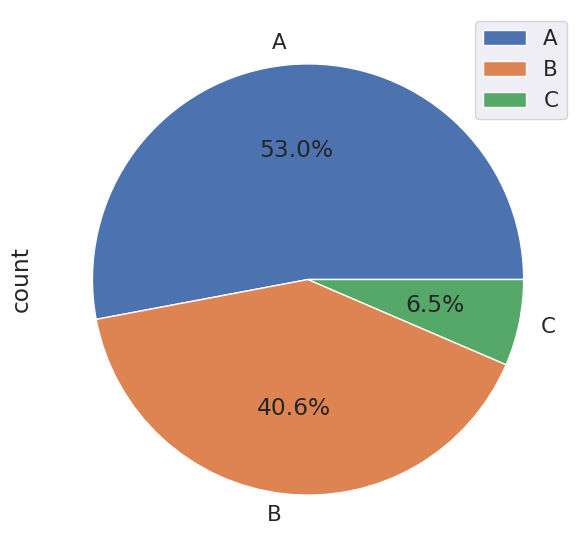

In [21]:
#let's see category 3 
category_3_count=pd.DataFrame(historicalNewmarchant['category_3'].value_counts())
category_3_count.plot.pie(y='count',figsize=(7,7),autopct='%1.1f%%')

* I will use decision tree to predict the missing values here 

#### Imputing Category_3 table Using **Decision Tree**

In [22]:
historicalNewmarchant.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31075392 entries, 0 to 1963030
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   authorized_flag       object 
 1   card_id               object 
 2   city_id               int64  
 3   category_1            object 
 4   installments          int64  
 5   category_3            object 
 6   merchant_category_id  int64  
 7   merchant_id           object 
 8   month_lag             int64  
 9   purchase_amount       float64
 10  purchase_date         object 
 11  category_2            float64
 12  state_id              int64  
 13  subsector_id          int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 3.5+ GB


In [23]:
for i in ['authorized_flag','city_id','category_1','installments','merchant_category_id','month_lag','category_3'] :
    historicalNewmarchant[i]=historicalNewmarchant[i].astype('category')

In [24]:
x_test=historicalNewmarchant.loc[historicalNewmarchant['category_3'].isna()==True,['authorized_flag','city_id','category_1','installments','merchant_category_id','month_lag']]
x_train=historicalNewmarchant.loc[historicalNewmarchant['category_3'].isna()!=True,['authorized_flag','city_id','category_1','installments','merchant_category_id','month_lag','category_3']].sample(n=5000000, replace=True)
y_train=x_train.pop('category_3')

In [25]:
print('Testing shape',x_test.shape)
print('Training shape',x_train.shape)
print('Training label shape',y_train.shape)

Testing shape (234081, 6)
Training shape (5000000, 6)
Training label shape (5000000,)


In [26]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y_train=le.fit_transform(y_train)

In [27]:
encoded_data = pd.get_dummies(x_train)


In [28]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(encoded_data, y_train)


In [29]:
encoded_data_test = pd.get_dummies(x_test)


In [30]:
y_pred=clf.predict(encoded_data_test)
y_pred=le.inverse_transform(y_pred)

In [31]:
historicalNewmarchant['category_3'].loc[historicalNewmarchant['category_3'].isna()==True]=y_pred

* Let's see the pie chart again 

<Axes: ylabel='count'>

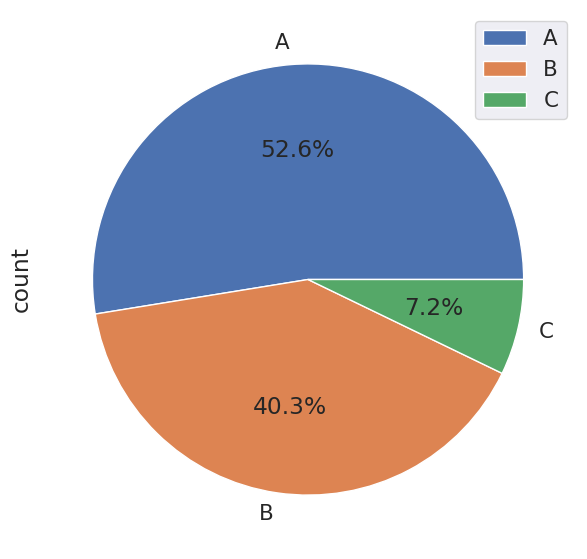

In [32]:
category_3_count=pd.DataFrame(historicalNewmarchant['category_3'].value_counts())
category_3_count.plot.pie(y='count',figsize=(7,7),autopct='%1.1f%%')

In [33]:
historicalNewmarchant.isna().sum()

authorized_flag               0
card_id                       0
city_id                       0
category_1                    0
installments                  0
category_3                    0
merchant_category_id          0
merchant_id              164697
month_lag                     0
purchase_amount               0
purchase_date                 0
category_2              2764609
state_id                      0
subsector_id                  0
dtype: int64

* Let's see the description of **category_2**

In [34]:
historicalNewmarchant['category_2']=historicalNewmarchant['category_2'].astype('category')

<Axes: ylabel='count'>

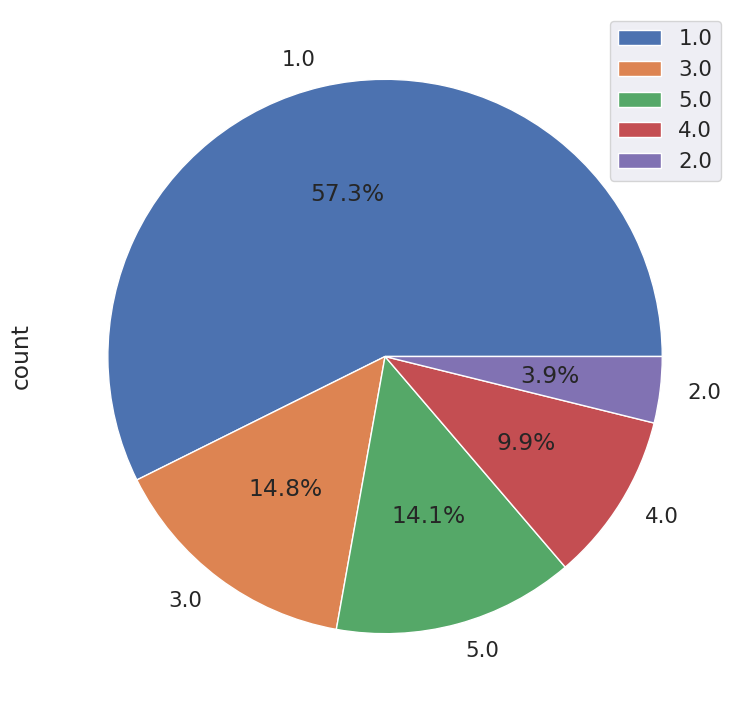

In [35]:
category_2_count=pd.DataFrame(historicalNewmarchant['category_2'].value_counts())
category_2_count.plot.pie(y='count',figsize=(9,9),autopct='%1.1f%%')

* For **marchent_id** and **Category2** I will drop nulls .

In [36]:
historicalNewmarchant.dropna(inplace=True)

In [37]:
historicalNewmarchant.drop(columsToDrop,axis=1,inplace=True)

#### For Marchants Table

* From this description which had seen earlier we notices :
* There are some features that it's max is infinity **[avg_purchases_lag6,avg_purchases_lag12,avg_purchases_lag3]**
* columns like **active_months_lag12** , **active_months_lag3** and **active_months_lag6** won't add value as their values are almost 12 
* columns like **[ avg_sales_lag3,avg_sales_lag12, avg_sales_lag3, avg_sales_lag6]** has outliars which affected mean and std
* columns like **[numerical_1,numerical_2]** are almost the same

In [38]:
marchants.dropna(inplace=True)

In [39]:
marchants.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322802 entries, 0 to 334695
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   merchant_id                  322802 non-null  object 
 1   merchant_group_id            322802 non-null  int64  
 2   merchant_category_id         322802 non-null  int64  
 3   subsector_id                 322802 non-null  int64  
 4   numerical_1                  322802 non-null  float64
 5   numerical_2                  322802 non-null  float64
 6   category_1                   322802 non-null  object 
 7   most_recent_sales_range      322802 non-null  object 
 8   most_recent_purchases_range  322802 non-null  object 
 9   avg_sales_lag3               322802 non-null  float64
 10  avg_purchases_lag3           322802 non-null  float64
 11  active_months_lag3           322802 non-null  int64  
 12  avg_sales_lag6               322802 non-null  float64
 13  avg_

In [40]:
for i in ['active_months_lag3','active_months_lag6','active_months_lag12','category_2'] :
    marchants[i]=marchants[i].astype('category')

In [41]:
clos2Drop=['merchant_group_id','merchant_category_id','subsector_id']
marchants.drop(columsToDrop,axis=1,inplace=True)

In [42]:
marchants['merchant_id'].duplicated().sum()

39

#### Merging tables 

In [43]:
historical_Merchants=historicalNewmarchant.merge(marchants,on='merchant_id',how='inner')

In [44]:
# historical_Merchants.isna().sum()

In [45]:
dropcols=['category_2_y','merchant_group_id','category_1_y','merchant_id','purchase_date']
historical_Merchants.drop(dropcols,axis=1,inplace=True)

In [46]:
# historical_Merchants.drop(['merchant_id','purchase_date'],axis=1,inplace=True)

In [47]:
historical_Merchants['month_lag']=historical_Merchants['month_lag'].astype('int')

In [48]:
print('historical_Merchants Sum checking :')
historical_Merchants.isna().sum()
print('*'*200)
print('historical_Merchants information :')
historical_Merchants.info()

historical_Merchants Sum checking :


authorized_flag                0
card_id                        0
category_1_x                   0
installments                   0
category_3                     0
month_lag                      0
purchase_amount                0
category_2_x                   0
numerical_1                    0
numerical_2                    0
most_recent_sales_range        0
most_recent_purchases_range    0
avg_sales_lag3                 0
avg_purchases_lag3             0
active_months_lag3             0
avg_sales_lag6                 0
avg_purchases_lag6             0
active_months_lag6             0
avg_sales_lag12                0
avg_purchases_lag12            0
active_months_lag12            0
category_4                     0
dtype: int64

********************************************************************************************************************************************************************************************************
historical_Merchants information :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26137495 entries, 0 to 26137494
Data columns (total 22 columns):
 #   Column                       Dtype   
---  ------                       -----   
 0   authorized_flag              category
 1   card_id                      object  
 2   category_1_x                 category
 3   installments                 category
 4   category_3                   category
 5   month_lag                    int64   
 6   purchase_amount              float64 
 7   category_2_x                 category
 8   numerical_1                  float64 
 9   numerical_2                  float64 
 10  most_recent_sales_range      object  
 11  most_recent_purchases_range  object  
 12  avg_sales_lag3               float64 
 13 

In [49]:
%%time 
historical_Merchants_group = historical_Merchants.groupby('card_id').agg({
    'category_1_x':lambda x: x.mode()[0],
    'installments':lambda x: x.mode()[0],
    'category_3':lambda x: x.mode()[0],
    'category_2_x':lambda x: x.mode(
    )[0],
    'active_months_lag3':lambda x: x.mode()[0],
    'active_months_lag12':lambda x: x.mode()[0],
    'most_recent_sales_range':lambda x: x.mode()[0],
    'most_recent_purchases_range':lambda x: x.mode()[0],
    'month_lag':'mean',
    'purchase_amount':'mean',
    'numerical_1':'mean',
    'numerical_2':'mean',
    'avg_sales_lag3':'mean',
    'avg_sales_lag6':'mean',
    'avg_sales_lag12':'mean'
    
})



CPU times: user 4min 32s, sys: 5.69 s, total: 4min 38s
Wall time: 4min 35s


In [50]:
historical_Merchants_group = historical_Merchants_group.reset_index()

In [51]:
historical_Merchants_group.duplicated().sum()

0

### Merging AllData with user_Score 

In [52]:
Data=historical_Merchants_group.merge(user_Score,on='card_id',how='inner')

# Saving Cleaned Data
# Data.to_csv('CleanedData1.csv')

## part 2 q) 4

In [53]:
Data=pd.read_csv(r'CleanedData.csv')


In [54]:
Data.head()

,Unnamed: 0,card_id,category_1_x,installments,category_3,category_2_x,active_months_lag3,active_months_lag12,most_recent_sales_range,most_recent_purchases_range,...,numerical_1,numerical_2,avg_sales_lag3,avg_sales_lag6,avg_sales_lag12,first_active_month,feature_1,feature_2,feature_3,score
0,0,C_ID_00007093c1,N,1,B,3.0,3,12,D,D,...,2.221820,2.198576,0.957541,1.019918,1.097951,Feb-17,5,1,1,0.134077
1,1,C_ID_0001506ef0,N,0,A,3.0,3,12,A,A,...,1.011203,0.872242,1.037231,1.055231,1.073846,Jul-16,2,2,0,0.884295
2,2,C_ID_000183fdda,N,1,B,3.0,3,12,C,C,...,0.207257,0.156550,1.081929,1.200929,1.148786,Sep-17,4,1,0,-0.264433
3,3,C_ID_00027503e2,N,0,A,3.0,3,12,C,C,...,-0.006117,-0.008150,0.999744,1.014103,1.026410,May-17,3,1,1,0.812872
4,4,C_ID_0002c7c2c1,N,0,A,1.0,3,12,A,A,...,13.796275,12.781456,1.047647,1.746912,2.531912,Apr-17,3,2,1,1.288514


In [55]:
Data.drop('Unnamed: 0',axis=1,inplace=True)

In [56]:
Data.describe(percentiles=[0.01,0.99])

,installments,category_2_x,active_months_lag3,active_months_lag12,month_lag,purchase_amount,numerical_1,numerical_2,avg_sales_lag3,avg_sales_lag6,avg_sales_lag12,feature_1,feature_2,feature_3,score
count,196682.000000,196682.000000,196682.000000,196682.000000,196682.000000,196682.000000,196682.000000,196682.000000,196682.000000,196682.000000,196682.000000,196682.000000,196682.000000,196682.000000,196682.000000
mean,0.561724,2.253658,2.999964,11.994229,-3.456330,1.595846,5.775831,5.638839,242.632436,224.096495,204.283095,3.107112,1.742854,0.570327,-0.389490
std,0.767351,1.513818,0.007478,0.149544,2.327405,714.263262,9.415789,9.271575,7100.795055,6445.050595,5817.431106,1.181606,0.753765,0.495031,3.812676
min,-1.000000,1.000000,1.000000,1.000000,-13.000000,-0.746893,-0.057471,-0.057471,-1.746803,-1.618673,-1.608367,1.000000,1.000000,0.000000,-33.219281
1%,0.000000,1.000000,3.000000,12.000000,-9.012721,-0.728876,-0.048086,-0.057471,0.902842,0.884503,0.876725,1.000000,1.000000,0.000000,-33.219281
50%,1.000000,1.000000,3.000000,12.000000,-3.181818,-0.625020,2.067232,1.990249,1.045150,1.082059,1.117658,3.000000,2.000000,1.000000,-0.030620
99%,3.000000,5.000000,3.000000,12.000000,0.520000,1.155107,44.949642,44.283840,2501.228281,2364.501528,2149.278055,5.000000,3.000000,1.000000,4.784241
max,12.000000,5.000000,3.000000,12.000000,2.000000,316346.913213,172.719653,170.736672,851844.640000,770443.340000,689561.850000,5.000000,3.000000,1.000000,17.965068


* If we looked at desribe we saw that installments ,active_months_lag3,active_months_lag12 **has ouliars**
* numerical_1 , numerical 2 has the same values 


<Axes: xlabel='active_months_lag3', ylabel='Count'>

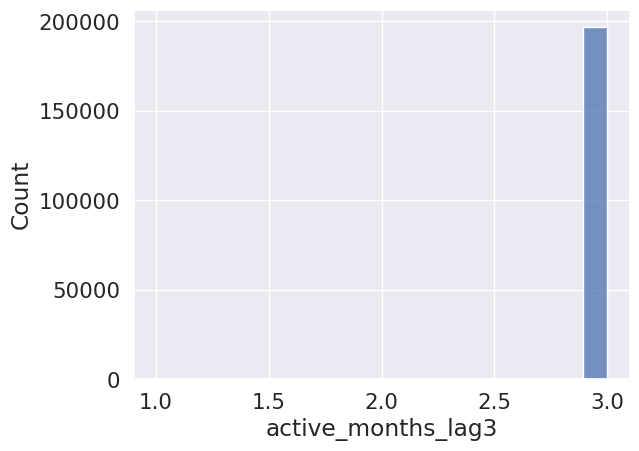

In [57]:
sns.histplot(Data['active_months_lag3'])


In [58]:
# As we noticed that almost all data in this feature = 3 we would like to see number of records that not equal 3 
Data.loc[Data['active_months_lag3']!=3]

,card_id,category_1_x,installments,category_3,category_2_x,active_months_lag3,active_months_lag12,most_recent_sales_range,most_recent_purchases_range,month_lag,...,numerical_1,numerical_2,avg_sales_lag3,avg_sales_lag6,avg_sales_lag12,first_active_month,feature_1,feature_2,feature_3,score
91664,C_ID_773464acd7,N,1,B,1.0,1,1,A,A,-3.5,...,0.021849,-0.057471,1.0200,1.040,1.055,Aug-16,5,1,1,-0.632351
111175,C_ID_90c238e91e,N,1,B,1.0,2,2,D,D,-6.0,...,-0.057471,-0.057471,0.7050,0.725,0.690,May-17,3,1,1,-0.259245
132805,C_ID_ad0cad9a5d,N,2,C,4.0,2,2,E,E,-3.0,...,-0.057471,-0.057471,9.3000,9.300,9.300,Aug-17,1,3,0,-0.268812
140878,C_ID_b77368702a,N,-1,C,3.0,1,1,D,E,-2.0,...,-0.057471,-0.057471,1.0000,1.000,1.000,Oct-17,5,1,1,0.289505
165337,C_ID_d78a98f080,N,1,B,1.0,2,2,E,E,-1.0,...,0.205274,0.200317,1.3525,1.410,1.540,Sep-17,2,1,0,-0.981447


* Althought there are few number of different values in these features i won't drop them 

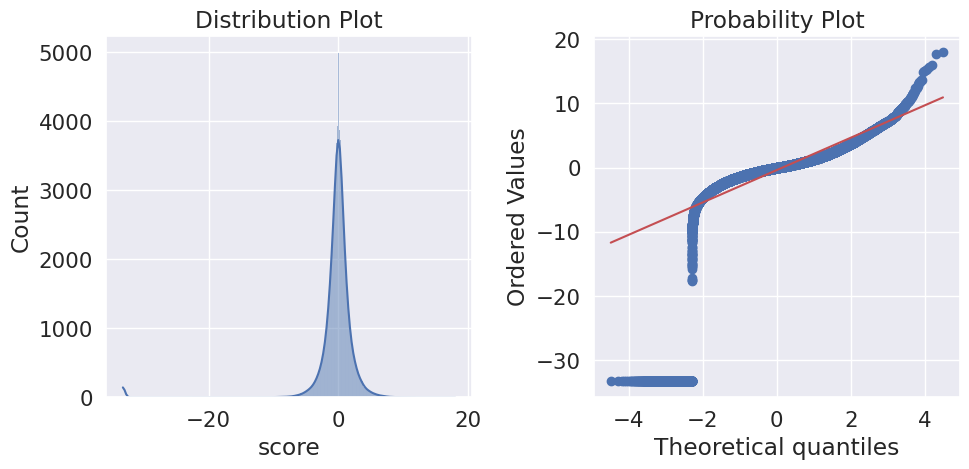

In [59]:
def normality_plot(X):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    sns.histplot(X,kde=True,ax=axes[0])
    axes[0].set_title('Distribution Plot')
    #`probplot` generates a probability plot, which should not be confused with a Q-Q or a P-P plot.  Statsmodels has more extensive functionality of this type, see ``statsmodels.api.ProbPlot``
    axes[1] = stats.probplot((X), plot=plt)
    plt.tight_layout()

normality_plot(Data['score'])



<Axes: >

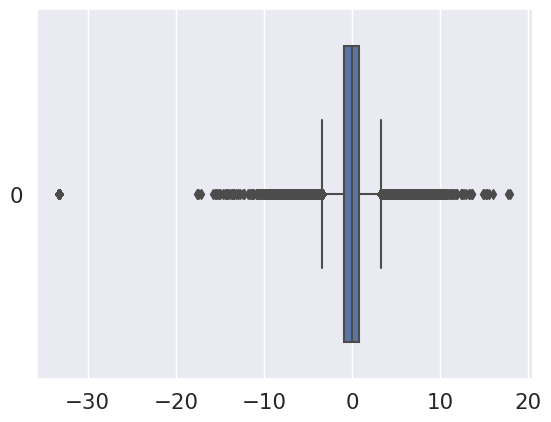

In [60]:
sns.boxplot(Data['score'],orient='h')


In [61]:
# We will test normality in another way 
df=Data['score'].sample(4000)
scipy.stats.shapiro(df)

ShapiroResult(statistic=0.44704103469848633, pvalue=0.0)

**Since in the above example, the p-value is 0.0 which is less than the alpha(0.05) 
then we reject the null hypothesis i.e. we have sufficient evidence to say that sample does not come from a normal distribution.**

* As seen **Score** is normally distributed but there is **several point ouliars that affect it's mean** 

In [62]:
Data.loc[Data['score']<-20]

,card_id,category_1_x,installments,category_3,category_2_x,active_months_lag3,active_months_lag12,most_recent_sales_range,most_recent_purchases_range,month_lag,...,numerical_1,numerical_2,avg_sales_lag3,avg_sales_lag6,avg_sales_lag12,first_active_month,feature_1,feature_2,feature_3,score
72,C_ID_001982552a,N,1,B,1.0,3,12,A,A,-1.936709,...,6.572337,6.165199,1.070886,1.134304,1.145949,Feb-17,2,1,0,-33.219281
118,C_ID_0029d52418,N,1,B,1.0,3,12,A,A,-11.600000,...,23.322865,22.967912,1.105000,1.078500,1.078500,Nov-16,2,1,0,-33.219281
218,C_ID_0046b2b355,N,0,A,1.0,3,12,C,C,-3.304348,...,0.494746,0.489573,1.068261,1.153478,1.208261,Feb-17,3,2,1,-33.219281
252,C_ID_0050fc55c0,N,1,B,3.0,3,12,C,C,-4.928571,...,0.180487,0.170572,0.984286,0.948571,0.961429,Mar-14,3,3,1,-33.219281
263,C_ID_005799985c,N,0,A,1.0,3,12,D,D,-7.000000,...,0.229160,0.220147,1.035455,1.450000,2.135455,Dec-13,3,3,1,-33.219281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195874,C_ID_fef92ba5f2,N,0,A,4.0,3,12,A,A,-4.467890,...,0.514592,0.436455,1.078440,1.069450,1.106789,Oct-16,3,1,1,-33.219281
196046,C_ID_ff3435c003,N,1,B,1.0,3,12,B,B,-2.428571,...,0.031055,-0.046139,1.064286,1.050714,1.023571,Mar-17,1,1,0,-33.219281
196368,C_ID_ffa027c967,N,0,A,1.0,3,12,C,B,-1.146341,...,0.283747,0.267545,1.022439,1.057073,1.177073,Dec-16,5,2,1,-33.219281
196443,C_ID_ffbabb3754,N,0,A,1.0,3,12,C,C,-0.745763,...,9.709886,9.654934,1.035254,1.055424,1.056102,Jun-17,3,2,1,-33.219281


* Here if we saw **score feature** we will find that 2100 rows has the same value 
* So we will now try to discover is these values is an error from our joining or in data itself

In [63]:
# I will Drop outliars
# Data.drop(Data.loc[Data['score']<-20].index,axis=0,inplace=True)

In [64]:
numberofRedundentvalues=user_Score.shape[0]-user_Score['score'].nunique()
print('Number Of Redundent Values is ',numberofRedundentvalues)

Number Of Redundent Values is  4807


In [65]:
user_Score['score'].value_counts().sort_values(ascending=False)

score
-33.219281    2207
 0.000000     1630
 1.000000      117
-1.000000       81
-0.584963       35
              ... 
-1.388630        1
 3.651199        1
-0.842710        1
 1.207838        1
-1.859413        1
Name: count, Length: 197110, dtype: int64

* What does 0 score mean ?
* why there are cards with very low distribution like -33.2?

* I think data is **somehow scaled**

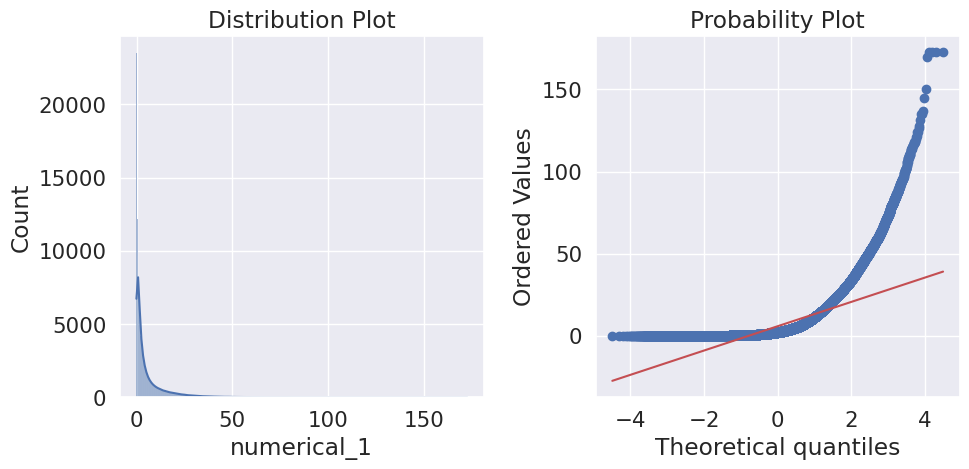

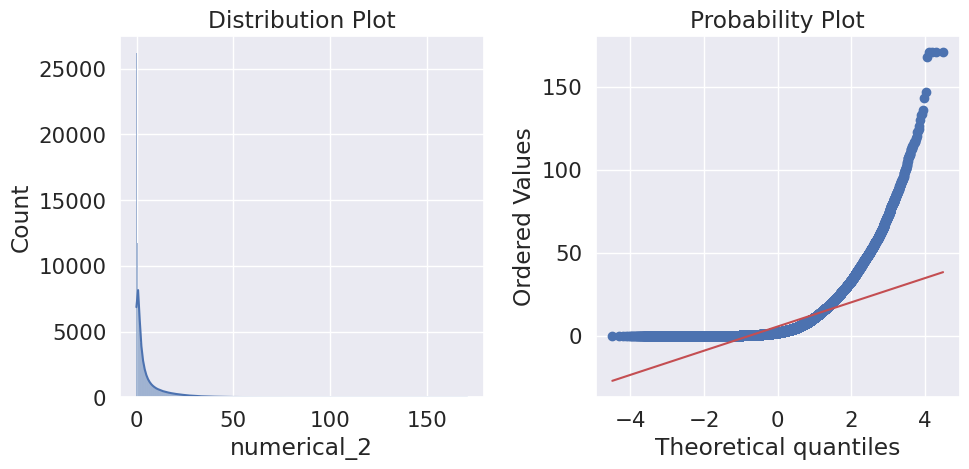

In [66]:
# Let's see two features numerical_1 , numerical_2
normality_plot(Data['numerical_1'])
normality_plot(Data['numerical_2'])


* We noticed that the **two features has the same distribution**
* So we will drop one of them 

In [67]:
#Data.reset_index(drop=True,inplace=True)

In [68]:
# I will Extract Month and year from first_active_month feature 
Data['Month']=''
Data['year']=1

for i in range(0,len(Data)):
    Data['Month'][i]=Data['first_active_month'][i][0:3]
    Data['year'][i]=2000 + int(Data['first_active_month'][i][4:])

Data.drop('first_active_month',axis=1,inplace=True)

<Axes: xlabel='Month', ylabel='Count'>

<Axes: xlabel='year', ylabel='Count'>

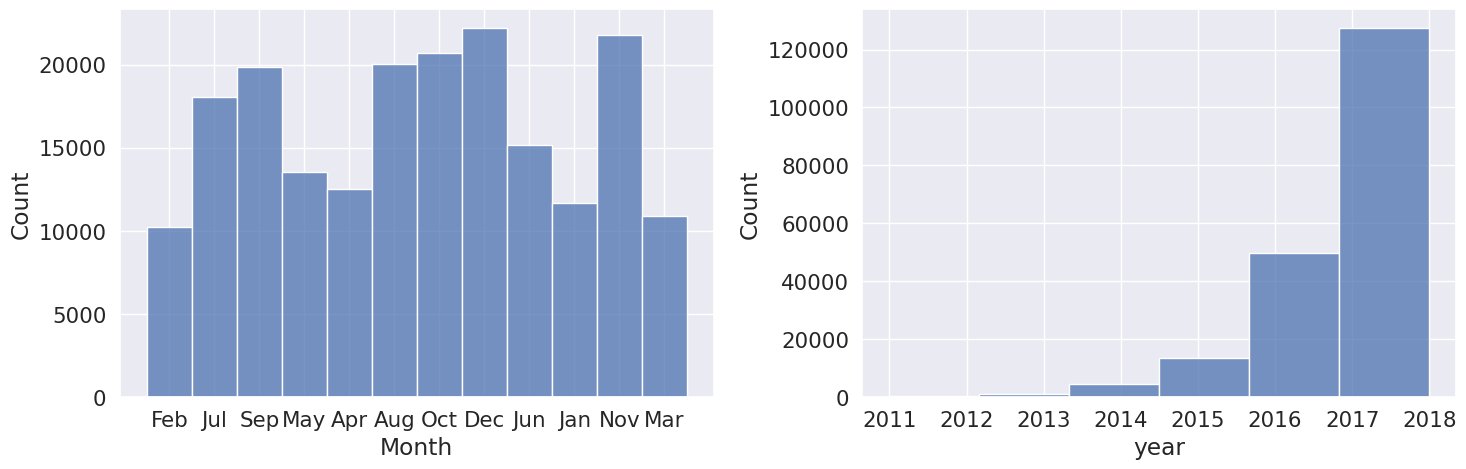

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(Data['Month'],ax=axes[0])
sns.histplot(Data['year'],ax=axes[1],bins=6)
plt.tight_layout()


## Q4 2) Two hypothesis tests 

## First question

* I susspect that in category_3 features they categorize people **based on their score**
#### so the question is : Is people's score in category A higher than in other Categories ?

#### I will follow these steps in two questions
1. Define the null and alternative hypotheses
2. Choose a significance level
3. Prepare the data
4. Perform a hypothesis test
5. Interpret the results 

##### First step 
<ul>
     <li><p> Here null hypothesis <strong> H0 </strong> is that <strong> The score of people in category A is less than or equal compared to others</strong></li>
    <li><p> Here Alternative hypothesis <strong> Ha </strong> is that <strong> The score of people in category A is greater than compared to others</strong></li>
</ul>
 

##### Second step 
<p> Significance level <strong> alpha </strong> is the probability of rejecting null hypothesis when it is actually true <strong> we will set it's value is <strong>.05</strong> </strong> 

##### Third step 
<p> we will split data into two groups one group contains the data in category A and the other contain all data except Category A </p>

In [70]:
Data_categoryA=Data.loc[Data['category_3']=='A','score']
Data_withoutCategoryA=Data.loc[Data['category_3']!='A','score']

##### Forth step 
<p> we will perform a <strong>hypothsis testing</strong>


In [71]:
t_Statistic, p_Value = scipy.stats.mannwhitneyu(x=Data_categoryA, y=Data_withoutCategoryA, alternative = 'greater')


In [72]:
print('P Value of Data :',p_Value)

P Value of Data : 0.9999999998312635


##### Final step 

* As p_value > alpha **we will accept null hypothesis**
* so **The score of people in category A is less than or equal compared to others**

## Second Question

* In the year 2016, Brazil hosted the Olympic Games, which may lead to an increase in per capita income, which may affect the loyality rate.

#### so the question is : Is there a difference between loyality score before and after 2016 ?

<ul>
     <li><p> Here null hypothesis <strong> H0 </strong> is that <strong> There is no difference in the score  before and after 2016</strong></li>
    <li><p> Here Alternative hypothesis <strong> Ha </strong> is that <strong> There is a difference in the score  before and after 2016</strong></li>
</ul>
 

In [81]:
data_before_2016 = Data.loc[Data['year'] < 2016 , 'score']
data_after_2016 = Data.loc[Data['year'] >= 2016 , 'score']

In [82]:
t_statistic, p_value =scipy.stats.mannwhitneyu(x=data_before_2016, y=data_after_2016, alternative ='two-sided')

In [83]:
print('P Value of Data before and after 2016 :',p_value)

P Value of Data before and after 2016 : 0.030622794948513377


* As we get p_value < significae level so **We will accept reject null hypothesis**
* Which mean that **There is a difference in the score before and after 2016 


## Q5 ) Regression Analysis 

* I merged **Q6** and **Q7** 

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge,LinearRegression
from sklearn.metrics import mean_squared_error



In [85]:
Data.drop('card_id',axis=1,inplace=True)

In [86]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196682 entries, 0 to 196681
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   category_1_x                 196682 non-null  object 
 1   installments                 196682 non-null  int64  
 2   category_3                   196682 non-null  object 
 3   category_2_x                 196682 non-null  float64
 4   active_months_lag3           196682 non-null  int64  
 5   active_months_lag12          196682 non-null  int64  
 6   most_recent_sales_range      196682 non-null  object 
 7   most_recent_purchases_range  196682 non-null  object 
 8   month_lag                    196682 non-null  float64
 9   purchase_amount              196682 non-null  float64
 10  numerical_1                  196682 non-null  float64
 11  numerical_2                  196682 non-null  float64
 12  avg_sales_lag3               196682 non-null  float64
 13 

In [87]:
Data['year']=Data['year'].astype('category')
Data['Month']=Data['Month'].astype('category')

y=Data.pop('score')

In [88]:
# splitting Data 
X_train, X_test, y_train, y_test = train_test_split(Data,y, test_size=0.2, shuffle=True, random_state=123)

<p> I want to scale Data but if I scaled All Data then i split it it will lead to <strong> Data Leakage </strong> so i scaled it on <strong> Training Data </strong> Then i transform on <strong> Test Data </strong> </p>

In [89]:
numerical_cols = list(Data.select_dtypes(exclude=['object','category']).columns)

scaler = RobustScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols]=scaler.transform(X_test[numerical_cols])

### I had to see Corrleation to know multicollinearity Features and select Features 

<Axes: >

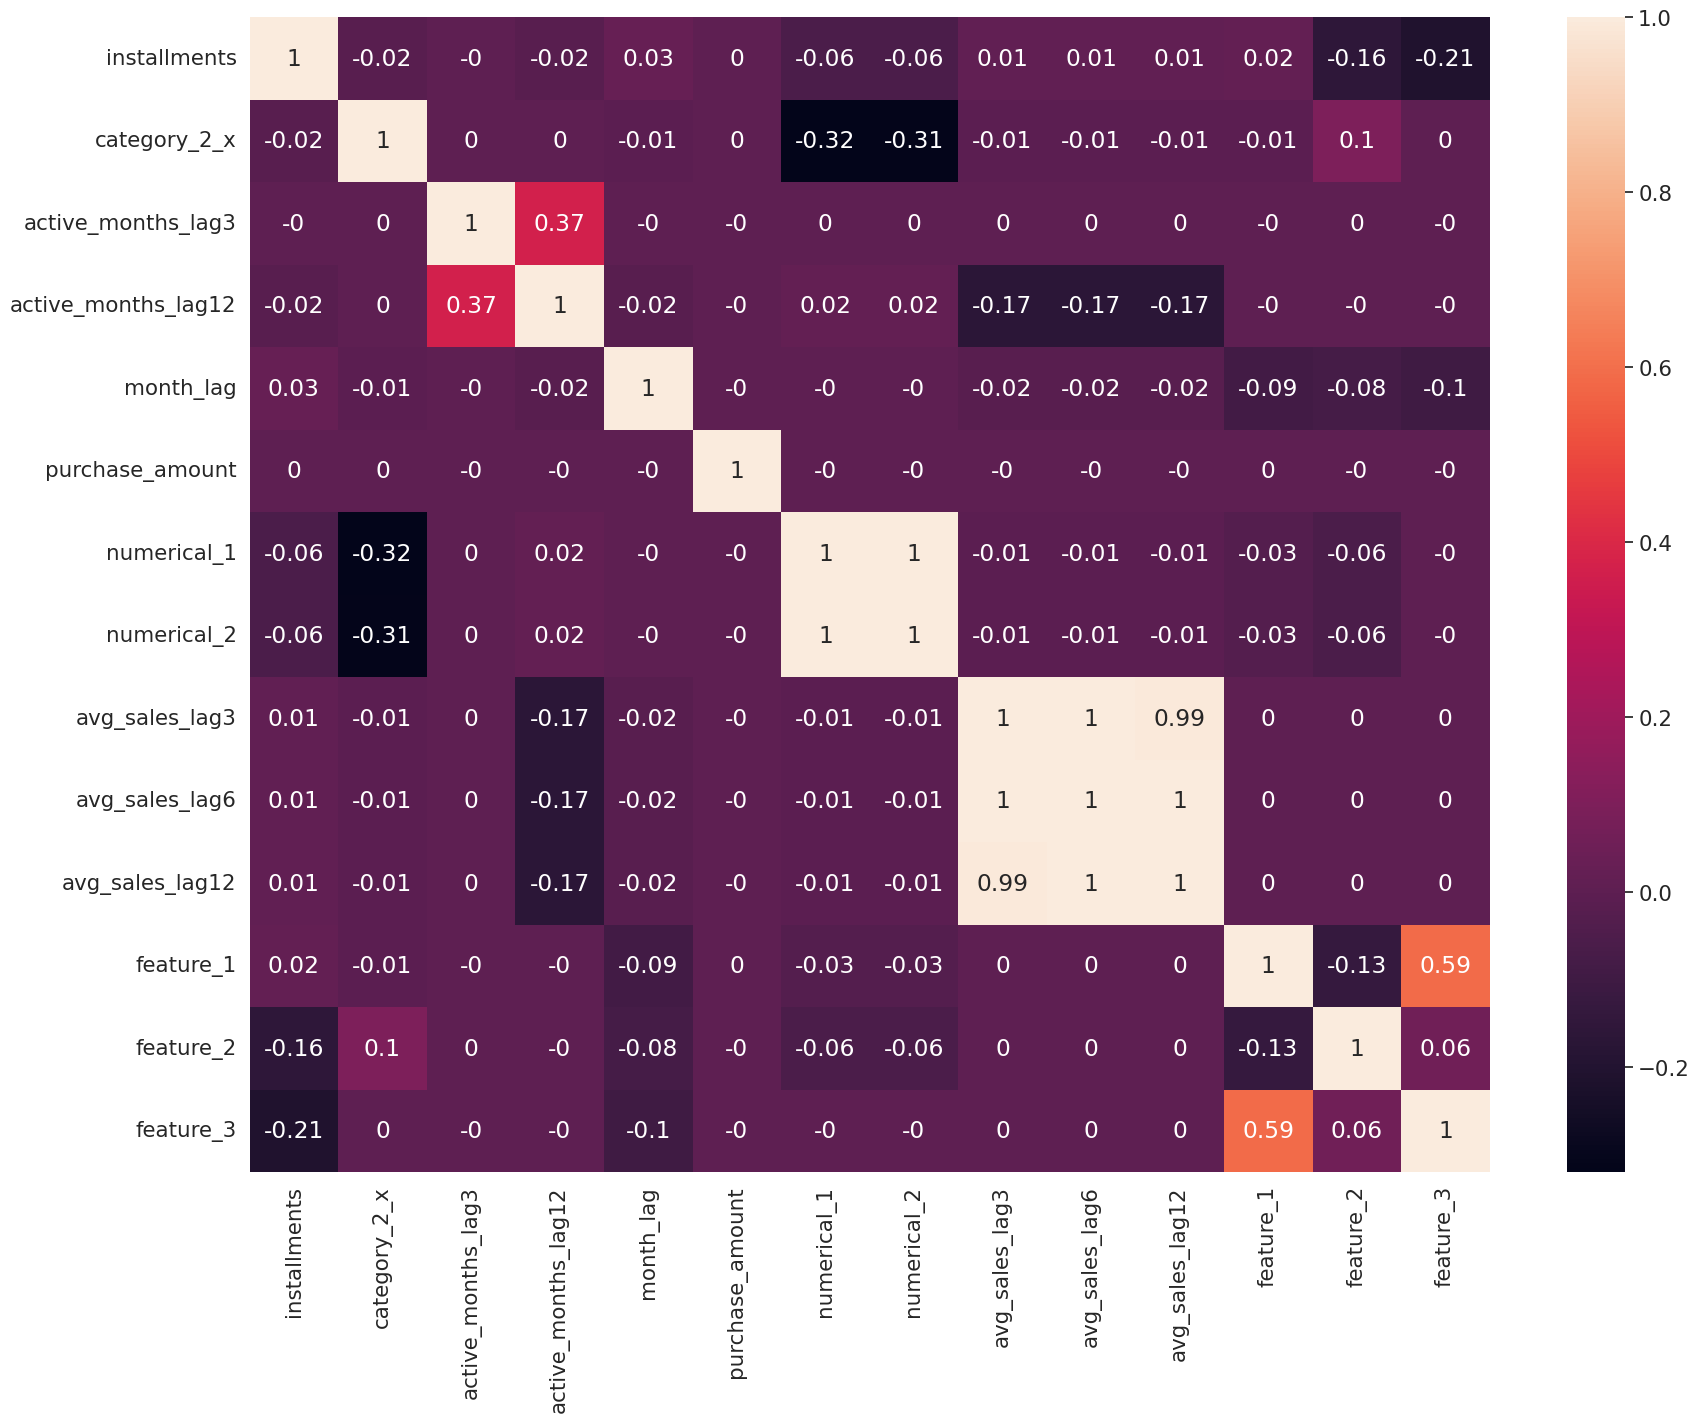

In [90]:
fig, ax = plt.subplots(figsize=(20, 15))
cor_df = X_train[numerical_cols].corr(method = "pearson").round(2)
sns.heatmap(cor_df, ax=ax, annot=True)

# Generate annotation labels array (of the same size as the heatmap data)- filling cells you don't want to annotate with an empty string ''
annot_labels = np.empty_like(cor_df, dtype=str)
annot_mask = cor_df >= 0.8
annot_labels[annot_mask] = 'T' 


* There is a **multicollinearity** between **numerical1** and **numerical2** 
* There is a **multicollinearity** between **avg_sales_lag3** , **avg_sales_lag6** and **avg_sales_lag12**


In [91]:
X_train.drop(['numerical_1','avg_sales_lag6','avg_sales_lag12'],axis=1,inplace=True)
X_test.drop(['numerical_1','avg_sales_lag6','avg_sales_lag12'],axis=1,inplace=True)

In [92]:
object_cols = X_train.select_dtypes(include=['object','category']).columns
numerical_cols = X_train.select_dtypes(exclude=['object','category']).columns


<p> On appling One hot encoder I should fit it on <strong> Train Data</strong> and transform on <strong> Test Data </strong >
    <ol> So I followed these steps : <li> select numerical and categorical Features <li> Applying One Hit encoding on Categorical Features <li > Concatenate numerical and Encoding </ol></p>

In [93]:
# applying one hot encoder 
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(X_train[object_cols])
encoded_test = encoder.transform(X_test[object_cols])


In [94]:
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(object_cols),index=X_train.index)
encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(object_cols),index=X_test.index)

In [95]:
X_train_encoded=pd.concat([encoded_df,X_train[numerical_cols]],axis=1)
X_test_encoded=pd.concat([encoded_test_df,X_test[numerical_cols]],axis=1)

In [96]:
X_train_encoded.shape

(157345, 45)

### Here I built the model and show the results 

In [97]:
# a multiple linear regression model
model_base = LinearRegression()

# With Ridge and Lasso
lambda_list_ridge = list(np.linspace(20, 25, 101))
model_ridge = Ridge(alpha=lambda_list_ridge[0])

def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))


def train_test(model):
    print(model)
    model.fit(X_train_encoded.values, y_train.values)
    print("RMSE train: {}".format(rmse(y_train.values, model.predict(X_train_encoded.values))))
    print("RMSE test : {}".format(rmse(y_test.values,  model.predict(X_test_encoded.values))))
    
    plt.scatter(y_test, model.predict(X_test_encoded.values), s=5 )
    plt.xlabel('Real Score')
    plt.ylabel('Predicted Score')
    plt.title( "Real vs Predicted Score")
    plt.show()

    plt.scatter( y_test,model.predict(X_test_encoded.values)-y_test, s=5)
    plt.xlabel('Real Score')
    plt.ylabel('Residual')
    plt.title( "Residuals vs Real")
    plt.show()



### Q8 )

LinearRegression()
RMSE train: 3.759234731995109
RMSE test : 4.013805731069335


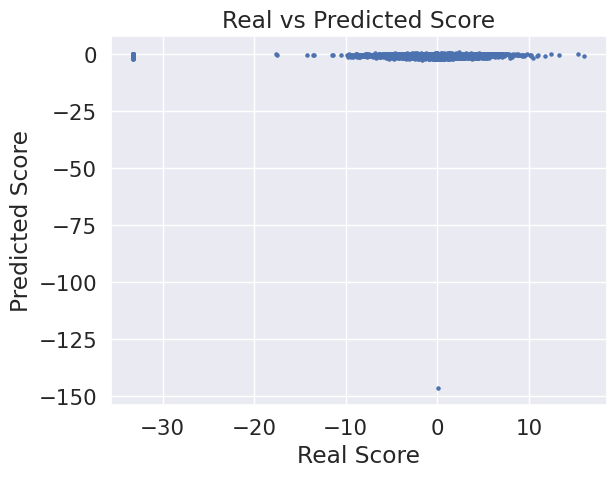

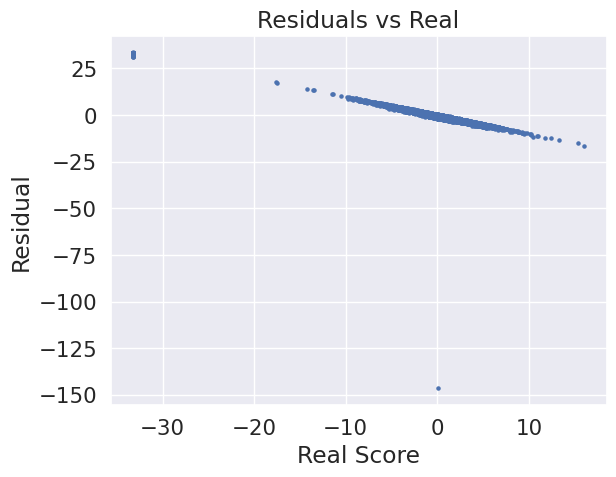

********************************************************************************************************************************************************************************************************
Ridge(alpha=20.0)
RMSE train: 3.7592574225921447
RMSE test : 4.013815093849081


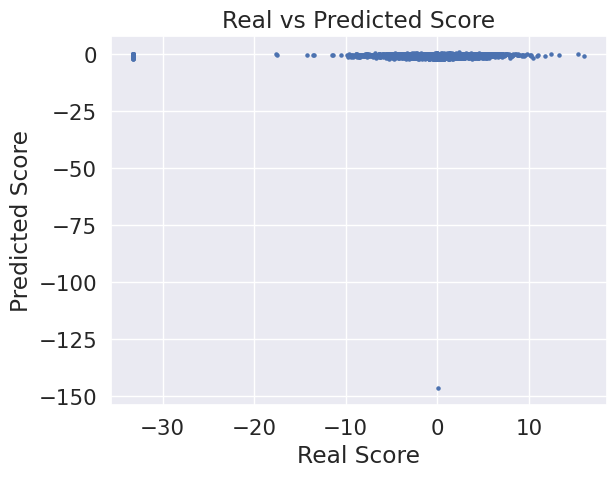

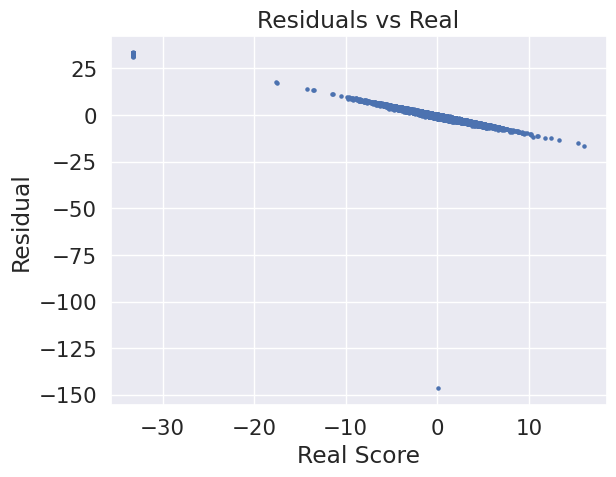

********************************************************************************************************************************************************************************************************


In [98]:
# a multiple linear regression model
model_base = LinearRegression()

# With Ridge and Lasso
lambda_list_ridge = list(np.linspace(20, 25, 101))
model_ridge = Ridge(alpha=lambda_list_ridge[0])


for model in [model_base, model_ridge]:
    train_test(model)
    print("*"*200)

<h2> Conclusion </h2>
<p> I get results from <strong> Linear Regression and Rigde </strong> <strong> RMSE</strong> <strong> On train --> 3.7  on test --> 4 </strong></p>

<p> But I don't agree with this error score because when i plot the correlation between features and target i got bad correlation between them </p>
<p> And I think this result is because the redundent of score value which if i dropped it the data will significantly decrease </p>

<h3> Another Trial </h3>
<p> we tried to drop outliars from score which values are -30 and we get <strong> RMSE </strong> <strong> on Train --> 1.7  on Test --> 1.6 </strong> But we found these results are normally because range of the data from -10 to 10 except these outliars but it's not logical to drop these outliars </p>